<h2 align="center">Predict Interest Rate

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv(r'https://raw.githubusercontent.com/MinhTrong92/Final-Test/main/Predict%20Interest%20Rate/loans_full_schema.csv')

In [3]:
df

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,...,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,global config engineer,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,NaN,NaN,NaN,...,C3,Mar-2018,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0
1,warehouse office clerk,10.0,HI,RENT,40000.0,Not Verified,5.04,NaN,NaN,NaN,...,C1,Feb-2018,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0
2,assembly,3.0,WI,RENT,40000.0,Source Verified,21.15,NaN,NaN,NaN,...,D1,Feb-2018,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0
3,customer service,1.0,PA,RENT,30000.0,Not Verified,10.16,NaN,NaN,NaN,...,A3,Jan-2018,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0
4,security supervisor,10.0,CA,RENT,35000.0,Verified,57.96,57000.0,Verified,37.66,...,C3,Mar-2018,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,owner,10.0,TX,RENT,108000.0,Source Verified,22.28,NaN,NaN,NaN,...,A4,Jan-2018,Current,whole,Cash,21586.34,2969.80,2413.66,556.14,0.0
9996,director,8.0,PA,MORTGAGE,121000.0,Verified,32.38,NaN,NaN,NaN,...,D3,Feb-2018,Current,whole,Cash,9147.44,1456.31,852.56,603.75,0.0
9997,toolmaker,10.0,CT,MORTGAGE,67000.0,Verified,45.26,107000.0,Source Verified,29.57,...,E2,Feb-2018,Current,fractional,Cash,27617.65,4620.80,2382.35,2238.45,0.0
9998,manager,1.0,WI,MORTGAGE,80000.0,Source Verified,11.99,NaN,NaN,NaN,...,A1,Feb-2018,Current,whole,Cash,21518.12,2873.31,2481.88,391.43,0.0


# Describe the dataset and any issues with it

In [4]:
#xem số dòng, số cột
df.shape

(10000, 55)

Bộ dữ liệu có 10000 bản ghi với 55 thuộc tính

In [5]:
#xem định dạng dữ liệu của các cột
df.dtypes

emp_title                            object
emp_length                          float64
state                                object
homeownership                        object
annual_income                       float64
verified_income                      object
debt_to_income                      float64
annual_income_joint                 float64
verification_income_joint            object
debt_to_income_joint                float64
delinq_2y                             int64
months_since_last_delinq            float64
earliest_credit_line                  int64
inquiries_last_12m                    int64
total_credit_lines                    int64
open_credit_lines                     int64
total_credit_limit                    int64
total_credit_utilized                 int64
num_collections_last_12m              int64
num_historical_failed_to_pay          int64
months_since_90d_late               float64
current_accounts_delinq               int64
total_collection_amount_ever    

In [6]:
#Kiểm tra các giá trị NULL
df.isnull().sum()

emp_title                            833
emp_length                           817
state                                  0
homeownership                          0
annual_income                          0
verified_income                        0
debt_to_income                        24
annual_income_joint                 8505
verification_income_joint           8545
debt_to_income_joint                8505
delinq_2y                              0
months_since_last_delinq            5658
earliest_credit_line                   0
inquiries_last_12m                     0
total_credit_lines                     0
open_credit_lines                      0
total_credit_limit                     0
total_credit_utilized                  0
num_collections_last_12m               0
num_historical_failed_to_pay           0
months_since_90d_late               7715
current_accounts_delinq                0
total_collection_amount_ever           0
current_installment_accounts           0
accounts_opened_

In [7]:
df.describe(include="all")

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,...,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
count,9167,9183.000000,10000,10000,1.000000e+04,10000,9976.000000,1.495000e+03,1455,1495.000000,...,10000,10000,10000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
unique,4741,NaN,50,3,NaN,3,NaN,NaN,3,NaN,...,32,3,6,2,2,NaN,NaN,NaN,NaN,NaN
top,manager,NaN,CA,MORTGAGE,NaN,Source Verified,NaN,NaN,Not Verified,NaN,...,B1,Mar-2018,Current,whole,Cash,NaN,NaN,NaN,NaN,NaN
freq,218,NaN,1330,4789,NaN,4116,NaN,NaN,611,NaN,...,647,3617,9375,8206,9284,NaN,NaN,NaN,NaN,NaN
mean,NaN,5.930306,NaN,NaN,7.922215e+04,NaN,19.308192,1.279146e+05,NaN,19.979304,...,NaN,NaN,NaN,NaN,NaN,14458.916610,2494.234773,1894.448466,599.666781,0.119516
std,NaN,3.703734,NaN,NaN,6.473429e+04,NaN,15.004851,7.016838e+04,NaN,8.054781,...,NaN,NaN,NaN,NaN,NaN,9964.561865,3958.230365,3884.407175,517.328062,1.813468
min,NaN,0.000000,NaN,NaN,0.000000e+00,NaN,0.000000,1.920000e+04,NaN,0.320000,...,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,2.000000,NaN,NaN,4.500000e+04,NaN,11.057500,8.683350e+04,NaN,14.160000,...,NaN,NaN,NaN,NaN,NaN,6679.065000,928.700000,587.100000,221.757500,0.000000
50%,NaN,6.000000,NaN,NaN,6.500000e+04,NaN,17.570000,1.130000e+05,NaN,19.720000,...,NaN,NaN,NaN,NaN,NaN,12379.495000,1563.300000,984.990000,446.140000,0.000000
75%,NaN,10.000000,NaN,NaN,9.500000e+04,NaN,25.002500,1.515455e+05,NaN,25.500000,...,NaN,NaN,NaN,NaN,NaN,20690.182500,2616.005000,1694.555000,825.420000,0.000000


Dữ liệu có 10000 dòng với 55 thuộc tính nhưng có chưa nhiều dữ liệu NA

Kiểu dữ liệu cơ bản được định đúng

Các cột chưa nhiều giá trị NA như annual_income_joint, verification_income_joint, debt_to_income_joint, months_since_last_delinq, months_since_90d_late sẽ xem xét bỏ qua trong quá trình phân tích dữ liệu



# Visualizations 

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

## State

In [9]:
summary_by_state = df.groupby(["state"], as_index=False)\
    ["loan_amount"]\
    .agg([np.size, np.sum]).reset_index().rename(columns={'size':'no_borrowers','sum':'total_loan_amount'})

In [10]:
summary_by_state.sort_values('no_borrowers', ascending=False, inplace=True, ignore_index=True)

In [11]:
summary_by_state['Percentage'] = summary_by_state['no_borrowers']/summary_by_state['no_borrowers'].sum()*100

In [12]:
summary_by_state['Cummulate']  = summary_by_state['Percentage'].cumsum()

In [13]:
summary_by_state

,state,no_borrowers,total_loan_amount,Percentage,Cummulate
0,CA,1330,22073700,13.30,13.30
1,TX,806,13755275,8.06,21.36
2,NY,793,12589650,7.93,29.29
3,FL,732,11203675,7.32,36.61
4,IL,382,6776600,3.82,40.43
5,OH,338,5434125,3.38,43.81
6,NJ,338,5665850,3.38,47.19
7,GA,334,5545300,3.34,50.53
8,NC,299,4809225,2.99,53.52
9,PA,298,4665825,2.98,56.50


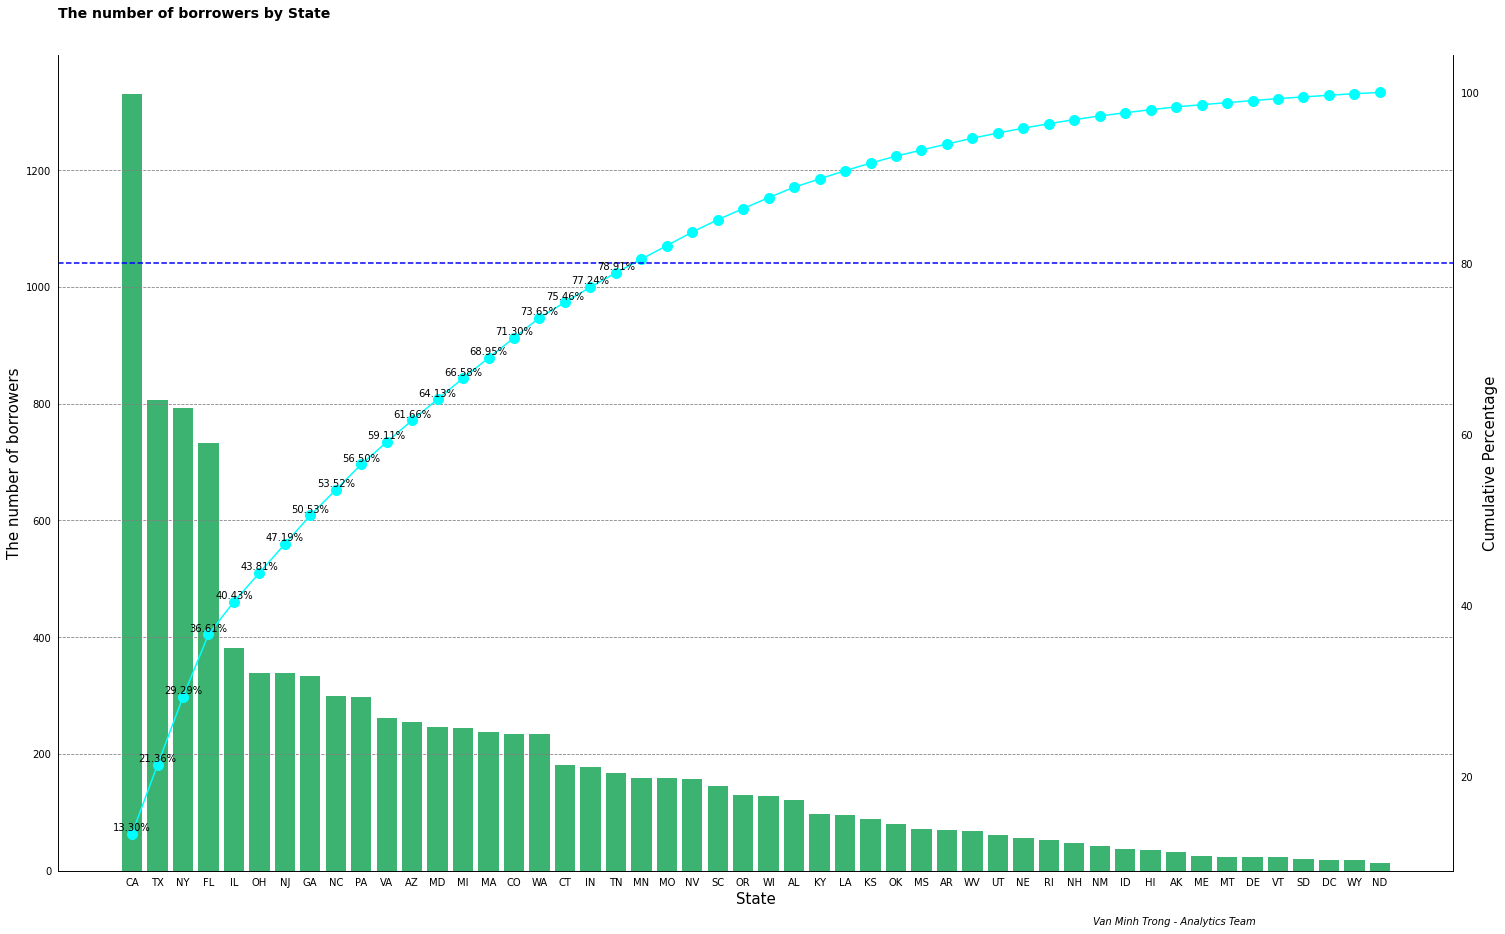

In [14]:
# Set figure and axis
fig, ax1 = plt.subplots(figsize=(25,15))
xs = summary_by_state['state']
ys = summary_by_state['no_borrowers']
yl = summary_by_state['Cummulate']

# Plot bars
ax1.bar(xs, ys, color = '#3cb371')
"""
for x,y in zip(xs,ys):

        label = "{:.2f}".format(y)

        ax1.annotate(label, # this is the text
                    (x,y), # these are the coordinates to position the label
                    textcoords="offset points", # how to position the text
                    xytext=(0,10), # distance from text to points (x,y)
                    ha='center') # horizontal alignment can be left, right or center
"""
#ax1.set_title("The number of borrowers by State", fontsize = 25, color = 'blue')
ax1.set_xlabel("State", fontsize = 15)
ax1.set_ylabel("The number of borrowers", fontsize = 15)

# Second y axis (i.e. cumulative percentage)
ax2 = ax1.twinx()
ax2.plot(xs,yl, color="#00ffff", marker="o", ms=10)

ax2.axhline(80, color="blue", linestyle="--") # Tạo đường 80%

#annotate for line
for x,y in zip(xs,yl):
    if y > 80:
        break
    else:
        label = "{:.2f}".format(y) + '%'

        ax2.annotate(label, # this is the text
                    (x,y), # these are the coordinates to position the label
                    textcoords="offset points", # how to position the text
                    xytext=(0,3), # distance from text to points (x,y)
                    ha='center') # horizontal alignment can be left, right or center
        
ax1.yaxis.grid(color='gray', linestyle='dashed')
ax1.tick_params(left=False, bottom=False)
ax2.tick_params(right=False, bottom=False) 

ax2.set_ylabel("Cumulative Percentage", fontsize = 15)

ax1.spines['top'].set_visible(False)
ax2.spines['top'].set_visible(False) 

plt.suptitle('The number of borrowers by State', fontweight='bold', size=14, horizontalalignment='left', x=0.125, y = 0.925)
plt.text(0.7, 0.075, "Van Minh Trong - Analytics Team", style='italic',transform=plt.gcf().transFigure)
plt.show()

**CA là bang có số lượng người vay nhiều nhất. Các bang TX, NY, FL cũng có số lượng người vay vượt trội hơn so với các bang còn lại.**

**5 bang có lượng người vay cao nhất đã chiếm gần 40% trong tổng số lượng người vay**

In [15]:
summary_by_state['proportion'] = summary_by_state['total_loan_amount']/summary_by_state['total_loan_amount'].sum()*100

In [16]:
top5_state = summary_by_state.loc[:, ['state','total_loan_amount','proportion']].head(5).copy()

In [17]:
top5_state['total_loan_amount'] = top5_state['total_loan_amount']/1000

In [18]:
top5_state.sort_values('total_loan_amount', ascending=True, inplace=True, ignore_index=True)

In [19]:
top5_state

,state,total_loan_amount,proportion
0,IL,6776.600,4.141689
1,FL,11203.675,6.847407
2,NY,12589.650,7.694481
3,TX,13755.275,8.406882
4,CA,22073.700,13.490896


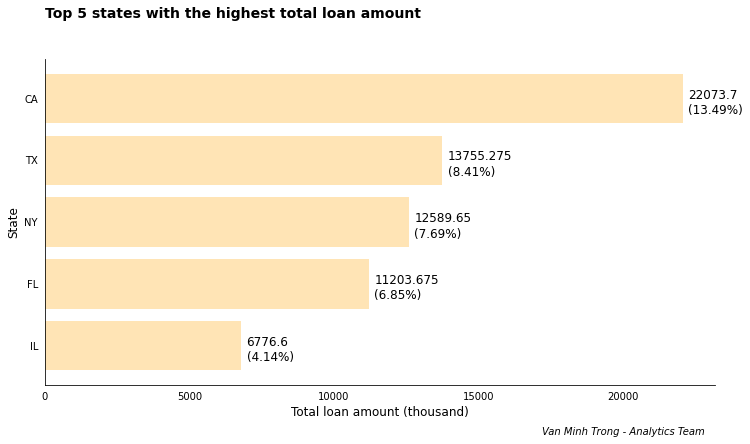

In [20]:
# plot
fig, ax = plt.subplots(figsize=(12, 6))

bar1 = ax.barh('state', 'total_loan_amount', data=top5_state, color='#ffe4b5')

# Show dữ liệu 
    # hoặc có thể dùng lệnh sau nếu không cần show %: ax.bar_label(bar1, size=10) # thêm option fmt='%.1f' nếu muốn format số)
i = 0
for p in bar1.patches:
    t1 = ax.annotate(top5_state.total_loan_amount[i], xy=(p.get_width()+200, p.get_y()+p.get_height()/2)) # số 200 ở đây tùy scale của chart mà ta tinh chỉnh để số liệu tách ra xa khỏi bar cho đẹp
    t2 = ax.annotate('('+str(top5_state.proportion.round(2)[i])+'%)', xy=(p.get_width()+200, p.get_y()+0.15))
    t1.set(size=12)
    t2.set(size=12)
    i+=1
    
# bỏ đường kẻ ở trên và bên phải chart
spines = ['top', 'right']
for s in spines:
    ax.spines[s].set_visible(False) 
    
# bỏ dấu tích ở 2 trục
ax.tick_params(left=False, bottom=False) 

# thêm title, label các trục và source:
plt.suptitle('Top 5 states with the highest total loan amount', fontweight='bold', size=14, horizontalalignment='left', x=0.125, y = 1)
#plt.title('2nd title', style='italic', size=12, loc='left')
plt.xlabel('Total loan amount (thousand)', size=12)
plt.ylabel('State', size=12)
plt.text(0.7, 0.01, "Van Minh Trong - Analytics Team", style='italic',transform=plt.gcf().transFigure)

plt.show()

**Đi cũng với số lượng người vay cao nhất, thì 5 bang CA, TX, NY, FL, IL cũng có lượng tiền được cho vay cao nhất**

## Loan purpose

In [21]:
summary_by_loan_purpose = df.groupby(["loan_purpose"], as_index=False)\
    ["loan_amount"]\
    .agg([np.size, np.sum]).reset_index().rename(columns={'size':'no_borrowers','sum':'total_loan_amount'})

In [22]:
summary_by_loan_purpose.sort_values('no_borrowers', ascending=True, inplace=True, ignore_index=True)

summary_by_loan_purpose

,loan_purpose,no_borrowers,total_loan_amount
0,renewable_energy,10,140000
1,vacation,62,421900
2,moving,69,682675
3,small_business,125,2477500
4,car,131,1361250
5,house,151,2689275
6,medical,162,1836800
7,major_purchase,303,4752425
8,home_improvement,680,11719225
9,other,914,11819025


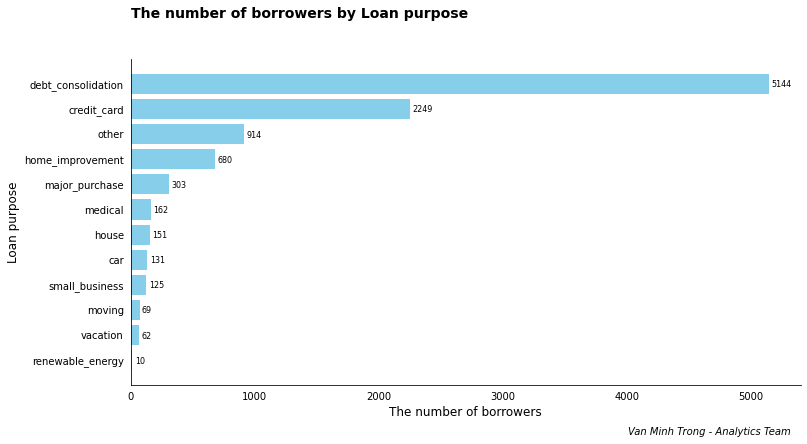

In [23]:
# plot
fig, ax = plt.subplots(figsize=(12, 6))

bar1 = ax.barh('loan_purpose', 'no_borrowers', data=summary_by_loan_purpose, color='#87ceeb')

# Show dữ liệu 
    # hoặc có thể dùng lệnh sau nếu không cần show %: ax.bar_label(bar1, size=10) # thêm option fmt='%.1f' nếu muốn format số)
i = 0
for p in bar1.patches:
    t1 = ax.annotate(summary_by_loan_purpose.no_borrowers[i], xy=(p.get_width()+20, p.get_y()+p.get_height()/3)) # số 200 ở đây tùy scale của chart mà ta tinh chỉnh để số liệu tách ra xa khỏi bar cho đẹp
    t1.set(size=8)
    i+=1
    
# bỏ đường kẻ ở trên và bên phải chart
spines = ['top', 'right']
for s in spines:
    ax.spines[s].set_visible(False) 
    
# bỏ dấu tích ở 2 trục
ax.tick_params(left=False, bottom=False) 

# thêm title, label các trục và source:
plt.suptitle('The number of borrowers by Loan purpose', fontweight='bold', size=14, horizontalalignment='left', x=0.125, y = 1)
#plt.title('2nd title', style='italic', size=12, loc='left')
plt.xlabel('The number of borrowers', size=12)
plt.ylabel('Loan purpose', size=12)
plt.text(0.7, 0.01, "Van Minh Trong - Analytics Team", style='italic',transform=plt.gcf().transFigure)

plt.show()

**Các khoản vay chủ yếu cho hoạt động hợp nhất nợ** *(debt_consolidation)*

**Tiếp đến là các khoản vay để mua sắm thông qua các thẻ tín dụng và sửa chữa, cải tạo nhà ở**


## Annual income

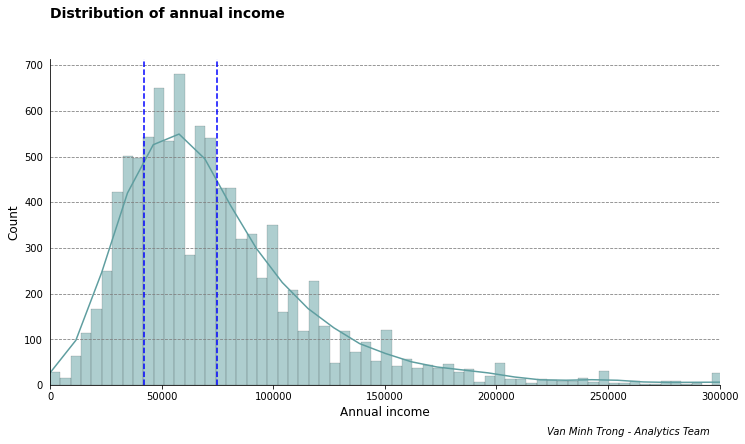

In [24]:
fig, ax = plt.subplots(figsize=(12, 6))

ax=sns.histplot(data=df, x=df.annual_income, kde=True, color='#5f9ea0')
ax.axvline(42000, color="blue", linestyle="--")
ax.axvline(75000, color="blue", linestyle="--")
plt.xlim(0, 300000)

ax.yaxis.grid(color='gray', linestyle='dashed')
# bỏ đường kẻ ở trên và bên phải chart
spines = ['top', 'right']
for s in spines:
    ax.spines[s].set_visible(False) 
    
# bỏ dấu tích ở 2 trục
ax.tick_params(left=False) 

# thêm title, label các trục và source:
plt.suptitle('Distribution of annual income', fontweight='bold', size=14, horizontalalignment='left', x=0.125, y = 1)
#plt.title('2nd title', style='italic', size=12, loc='left')
plt.xlabel('Annual income', size=12)
plt.ylabel('Count', size=12)
plt.text(0.7, 0.01, "Van Minh Trong - Analytics Team", style='italic',transform=plt.gcf().transFigure)

plt.show()

**Khách hàng vay tiền có mức thu nhập hàng nằm tập trung vào khoảng 42000 đến 75000**

## loan status and debt to income

In [25]:
df1 = df.loc[:, ['loan_status','debt_to_income']].copy()

In [26]:
median_list = df1.groupby('loan_status', as_index=False)['debt_to_income'].median().rename(columns={'debt_to_income':'median'})

In [27]:
median_list.sort_values('median', ascending=True, inplace=True, ignore_index=True)

In [28]:
median_list

,loan_status,median
0,Late (31-120 days),15.81
1,Fully Paid,16.15
2,Late (16-30 days),17.04
3,Current,17.65
4,In Grace Period,17.67
5,Charged Off,20.61


In [29]:
df2 = pd.merge(df1,median_list,on='loan_status',how='left')

In [30]:
df2.sort_values('median', ascending=True, inplace=True, ignore_index=True)

In [31]:
df2

,loan_status,debt_to_income,median
0,Late (31-120 days),3.54,15.81
1,Late (31-120 days),4.35,15.81
2,Late (31-120 days),31.08,15.81
3,Late (31-120 days),30.00,15.81
4,Late (31-120 days),2.98,15.81
...,...,...,...
9995,Charged Off,20.61,20.61
9996,Charged Off,29.31,20.61
9997,Charged Off,20.66,20.61
9998,Charged Off,34.72,20.61


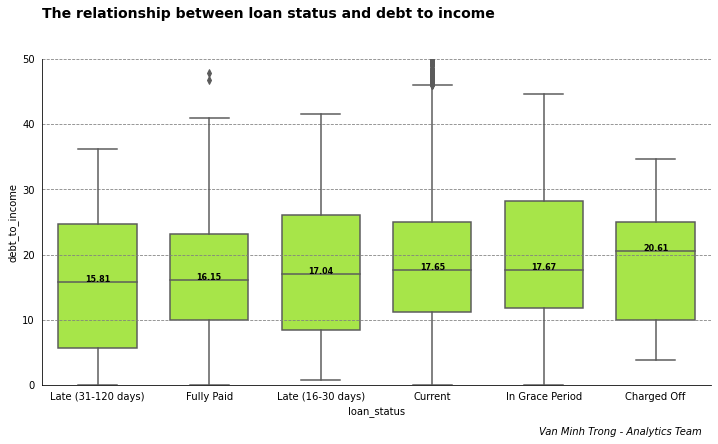

In [32]:
fig, ax = plt.subplots(figsize=(12, 6))
box_width=0.7

ax=sns.boxplot(x=df2.loan_status, y=df2.debt_to_income, data=df2, width=box_width, color='#adff2f')

# show medians
i = 0
for i in range(median_list.shape[0]):
    x = i #+box_width/2*1.05
    y = median_list.loc[i,['median']]
    ax.annotate('%.2f' %median_list.loc[i,['median']],
                  (x,y),
                  #color='white',
                  weight='semibold',
                ha='center',
                  size=8
                 )

# Add x, y gridlines
ax.yaxis.grid(color='gray', linestyle='dashed')

# bỏ đường kẻ ở trên và bên phải chart
spines = ['top', 'right']
for s in spines:
    ax.spines[s].set_visible(False) 
    
# bỏ dấu tích ở 2 trục
ax.tick_params(left=False, bottom=False) 

# thêm title, label các trục và source:
plt.suptitle('The relationship between loan status and debt to income', fontweight='bold', size=14, horizontalalignment='left', x=0.125, y = 1)
#plt.title('2nd title', style='italic', size=12, loc='left')
#plt.xlabel('loan_status', size=12)
#plt.ylabel('debt_to_income', size=12)
plt.text(0.7, 0.01, "Van Minh Trong - Analytics Team", style='italic',transform=plt.gcf().transFigure)

plt.ylim(0, 50)
plt.show()




**Những khoản vay trong tình trạng trễ từ 31-120 ngày lại thuộc về nhóm đối tượng vay có tỷ lệ nợ trên tổng thu nhập thấp nhất, thấp hơn cả những khoản vay có trạng tháy Full Paid (đã trả xong).**

**Những khoản vay trong tình trạng Charged Off (mất khả năng thanh toán) có tỷ lệ nợ trên tổng thu nhập rõ ràng cao hơn so với các nhóm còn lại**

## loan grade and interest rate

In [33]:
df_grade = df.loc[:, ['grade','interest_rate']].copy()

In [34]:
df_grade.sort_values('grade', ascending=True, inplace=True, ignore_index=True)

In [35]:
df_grade

,grade,interest_rate
0,A,6.72
1,A,7.34
2,A,6.07
3,A,7.34
4,A,7.34
...,...,...
9995,G,30.79
9996,G,30.79
9997,G,30.79
9998,G,30.79


In [36]:
median_list1 = df_grade.groupby('grade')['interest_rate'].median()

In [37]:
median_list1

grade
A     6.72
B    10.42
C    14.07
D    19.03
E    24.85
F    28.72
G    30.79
Name: interest_rate, dtype: float64

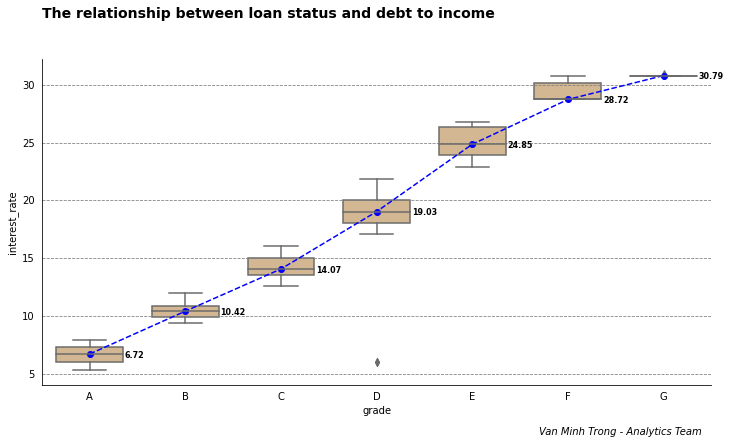

In [38]:
fig, ax = plt.subplots(figsize=(12, 6))

box_width=0.7
ax=sns.boxplot(x=df_grade.grade, y=df_grade.interest_rate, data=df_grade, width=box_width, color='#deb887')
ax.plot(range(len(median_list1)), median_list1, 'bo--', label= "versicolor")

# show medians
i = 0
for i in range(len(median_list1)):
    x = i+box_width/2*1.05
    y = median_list1[i]
    ax.annotate('%.2f' %median_list1[i],
                  (x,y-0.3),
                  #color='white',
                  weight='semibold',
                  size=8
                 )

# Add x, y gridlines
ax.yaxis.grid(color='gray', linestyle='dashed')

# bỏ đường kẻ ở trên và bên phải chart
spines = ['top', 'right']
for s in spines:
    ax.spines[s].set_visible(False) 
    
# bỏ dấu tích ở 2 trục
ax.tick_params(left=False, bottom=False) 

# thêm title, label các trục và source:
plt.suptitle('The relationship between loan status and debt to income', fontweight='bold', size=14, horizontalalignment='left', x=0.125, y = 1)
#plt.title('2nd title', style='italic', size=12, loc='left')
#plt.xlabel('loan_status', size=12)
#plt.ylabel('debt_to_income', size=12)
plt.text(0.7, 0.01, "Van Minh Trong - Analytics Team", style='italic',transform=plt.gcf().transFigure)


plt.show()


**Thứ hạng đánh giá ảnh hưởng rất nhiều đến mức lãi suất mà người vay phải trả. Mức đánh giá càng cao thì mức lãi suất càng thấp, mức đánh giá càng thấp thì lãi xuất sẽ càng cao**

# Create a model to predict interest rate

In [39]:
import scipy.stats as stats
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

### Tìm mối tương quan giữa biến interest_rate với một số biến khác

In [40]:
data = df.loc[:,['interest_rate','loan_amount','term','grade','sub_grade','annual_income','homeownership','verified_income','debt_to_income']].copy()

In [41]:
data

,interest_rate,loan_amount,term,grade,sub_grade,annual_income,homeownership,verified_income,debt_to_income
0,14.07,28000,60,C,C3,90000.0,MORTGAGE,Verified,18.01
1,12.61,5000,36,C,C1,40000.0,RENT,Not Verified,5.04
2,17.09,2000,36,D,D1,40000.0,RENT,Source Verified,21.15
3,6.72,21600,36,A,A3,30000.0,RENT,Not Verified,10.16
4,14.07,23000,36,C,C3,35000.0,RENT,Verified,57.96
...,...,...,...,...,...,...,...,...,...
9995,7.35,24000,36,A,A4,108000.0,RENT,Source Verified,22.28
9996,19.03,10000,36,D,D3,121000.0,MORTGAGE,Verified,32.38
9997,23.88,30000,36,E,E2,67000.0,MORTGAGE,Verified,45.26
9998,5.32,24000,36,A,A1,80000.0,MORTGAGE,Source Verified,11.99


In [42]:
#Thay thế các giá trị null của trường debt_to_income bằng giá trị mean
mean = data['debt_to_income'].mean()
data['debt_to_income'] = data['debt_to_income'].replace(np.nan,mean)

In [43]:
#LabelEncoder cho các trường grade, sub_grade, homeownership, verified_income
list_lable = ['grade', 'sub_grade', 'homeownership', 'verified_income']
for i in list_lable:
    data[i] = LabelEncoder().fit_transform(data[i])

In [44]:
data

,interest_rate,loan_amount,term,grade,sub_grade,annual_income,homeownership,verified_income,debt_to_income
0,14.07,28000,60,2,12,90000.0,0,2,18.01
1,12.61,5000,36,2,10,40000.0,2,0,5.04
2,17.09,2000,36,3,15,40000.0,2,1,21.15
3,6.72,21600,36,0,2,30000.0,2,0,10.16
4,14.07,23000,36,2,12,35000.0,2,2,57.96
...,...,...,...,...,...,...,...,...,...
9995,7.35,24000,36,0,3,108000.0,2,1,22.28
9996,19.03,10000,36,3,17,121000.0,0,2,32.38
9997,23.88,30000,36,4,21,67000.0,0,2,45.26
9998,5.32,24000,36,0,0,80000.0,0,1,11.99


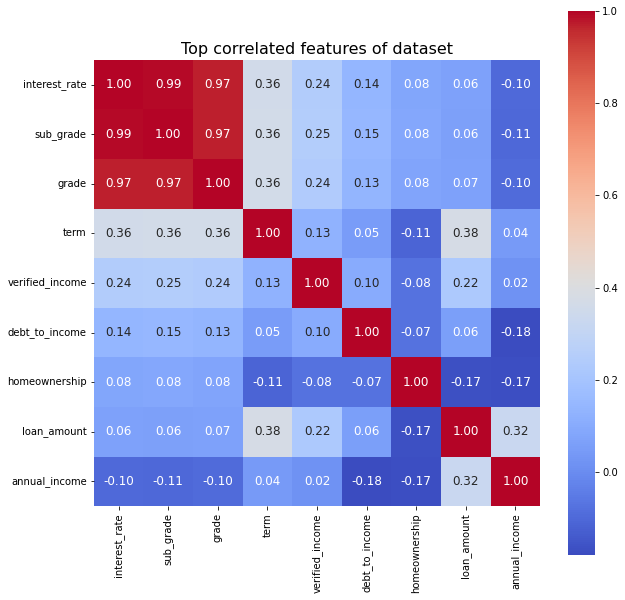

In [45]:
top = 10
corr = data.corr()
top15 = corr.nlargest(top, 'interest_rate')['interest_rate'].index
corr_top15 = data[top15].corr()

fig,ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr_top15, square=True, ax=ax, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={'size':12})
plt.title('Top correlated features of dataset', size=16)
plt.show()

**Có 2 biến grade và sub_grade có hệ số tương quan đối với biến interest_rate là lớn so với các biến còn lại**

Kiểm tra mối tương quan giữa interest_rate và grade

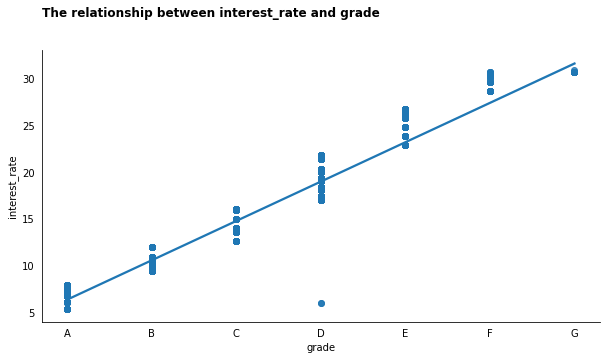

In [46]:
fig, ax = plt.subplots(figsize=(10, 5))

ax = sns.regplot(x=data['grade'], y=data['interest_rate'], data=data)

ax.set_xticks((0,1,2,3,4,5,6))
ax.set_xticklabels(('A', 'B', 'C', 'D', 'E', 'F','G'))

# bỏ đường kẻ ở trên và bên phải chart
spines = ['top', 'right']
for s in spines:
    ax.spines[s].set_visible(False) 
    
# bỏ dấu tích ở 2 trục
ax.tick_params(left=False, bottom=False)
plt.suptitle('The relationship between interest_rate and grade', fontweight='bold', size=12, horizontalalignment='left', x=0.125, y = 1)
plt.show()



In [47]:
pearson_coef, p_value = stats.pearsonr(data['grade'], data['interest_rate'])
print("Correlation Coefficient giữa grade và interest_rate là", pearson_coef, "và giá trị P-value là ", p_value)

Correlation Coefficient giữa grade và interest_rate là 0.969401637850799 và giá trị P-value là  0.0


Kiểm tra mối tương quan giữa interest_rate và grade

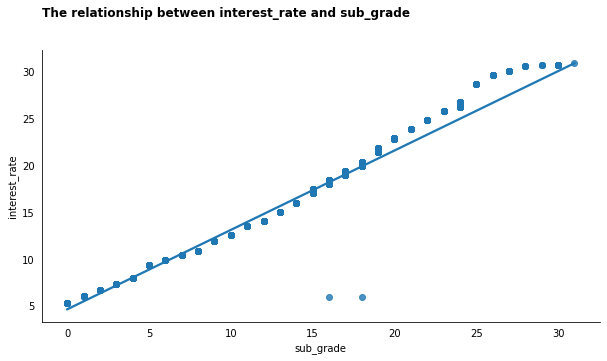

In [48]:
fig, ax = plt.subplots(figsize=(10, 5))

ax = sns.regplot(x=data['sub_grade'], y=data['interest_rate'], data=data)

# bỏ đường kẻ ở trên và bên phải chart
spines = ['top', 'right']
for s in spines:
    ax.spines[s].set_visible(False) 
    
# bỏ dấu tích ở 2 trục
ax.tick_params(left=False, bottom=False)
plt.suptitle('The relationship between interest_rate and sub_grade', fontweight='bold', size=12, horizontalalignment='left', x=0.125, y = 1)
plt.show()


In [49]:
pearson_coef, p_value = stats.pearsonr(data['sub_grade'], data['interest_rate'])
print("Correlation Coefficient giữa sub_grade và interest_rate là", pearson_coef, "và giá trị P-value là ", p_value)

Correlation Coefficient giữa sub_grade và interest_rate là 0.9929205599072662 và giá trị P-value là  0.0


### Xây dựng mô hình Linear Regression

In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [51]:
X = data[['grade','sub_grade']]
y = data['interest_rate']

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [53]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [54]:
y_pred = lin_reg.predict(X_test)

In [55]:
y_pred

array([20.63241294, 11.34694449,  7.08657024, ...,  9.05278471,
        6.32185031, 13.31315897])

In [56]:
intercept = lin_reg.intercept_

print(intercept)

4.792410451963194


In [57]:
slopes = lin_reg.coef_

print(slopes)

[0.43677462 0.76471993]


**Mô hình dự đoán:**

interest_rate = 4.7924 + 0.4368 * grade + 0.7647 * sub_grade


In [58]:
print('The full R-square is : ' +str((lin_reg.score(X,y)*100).round(5)) + '%')
print('The train R-square is : ' +str((lin_reg.score(X_train, y_train)*100).round(5)) + '%')
print('The test R-square is : ' +str((lin_reg.score(X_test, y_test)*100).round(5)) + '%')

The full R-square is : 98.65013%
The train R-square is : 98.60605%
The test R-square is : 98.82589%


**Hơn 98% interest_rate có thể giải thích được bằng mô hình trên**

In [59]:
#Find MSE , MAE
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
print('The MSE of interest_rate and predicted value is : ',mse.round(3))
print('The MAE of interest_rate and predicted value is : ',mae.round(3))

The MSE of interest_rate and predicted value is :  0.294
The MAE of interest_rate and predicted value is :  0.426


### Xây dựng mô hình Polynomial Regression

In [60]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score


In [61]:
dataset = data.loc[:,['interest_rate','sub_grade']]

In [62]:
dataset

,interest_rate,sub_grade
0,14.07,12
1,12.61,10
2,17.09,15
3,6.72,2
4,14.07,12
...,...,...
9995,7.35,3
9996,19.03,17
9997,23.88,21
9998,5.32,0


In [63]:
X = np.array(dataset['sub_grade']).reshape(-1,1)
y = np.array(dataset['interest_rate']).reshape(-1,1)

In [64]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [65]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(X_train)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y_train)



LinearRegression()

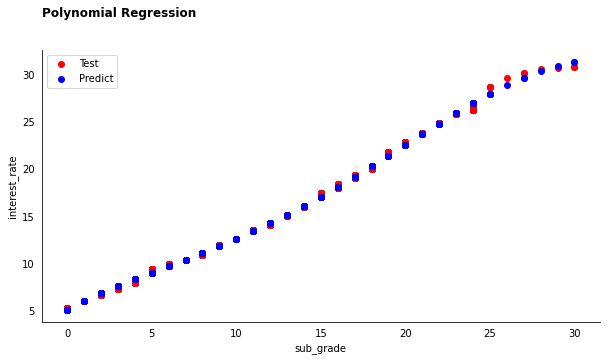

In [66]:
# Visualizing the Polymonial Regression results
fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(X_test, y_test, color='red', label='Test')
ax.scatter(X_test, pol_reg.predict(poly_reg.fit_transform(X_test)), color='blue', label='Predict')
plt.xlabel('sub_grade')
plt.ylabel('interest_rate')

# bỏ đường kẻ ở trên và bên phải chart
spines = ['top', 'right']
for s in spines:
    ax.spines[s].set_visible(False) 
    
# bỏ dấu tích ở 2 trục
ax.tick_params(left=False, bottom=False)

ax.legend()
plt.suptitle('Polynomial Regression', fontweight='bold', size=12, horizontalalignment='left', x=0.125, y = 1)
plt.show()


In [67]:
print('The full R-square is : ' +str((r2_score(y, pol_reg.predict(poly_reg.fit_transform(X)))*100).round(5)) + '%')
print('The train R-square is : ' +str((r2_score(y_train, pol_reg.predict(poly_reg.fit_transform(X_train)))*100).round(5)) + '%')
print('The test R-square is : ' +str((r2_score(y_test, pol_reg.predict(poly_reg.fit_transform(X_test)))*100).round(5)) + '%')

The full R-square is : 99.66587%
The train R-square is : 99.63015%
The test R-square is : 99.80847%


**Mô hình Polynomial Regression có thể giải thích được hơn 99% về interest rate**

In [68]:
#Find MSE , MAE
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(y_test, pol_reg.predict(poly_reg.fit_transform(X_test)))
mae = mean_absolute_error(y_test, pol_reg.predict(poly_reg.fit_transform(X_test)))
print('The MSE of interest_rate and predicted value is : ',mse.round(5))
print('The MAE of interest_rate and predicted value is : ',mae.round(5))

The MSE of interest_rate and predicted value is :  0.04797
The MAE of interest_rate and predicted value is :  0.17857
